In [2]:
#ESS controlling Algorithm for ENS Company
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import numpy as np
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv ('For multiple house and PVV2(generation high).csv')
df=df[0:193]
row,column=df.shape
df

,Time,PowerH1,Forecast_PowerH1,PowerH2,Forecast_PowerH2,PowerH3,Forecast_PowerH3,Power_Gen,Forecast_Gen
0,10/8/2020 0:00,0.117,0.161884,0.144,0.113941,0.279,0.167440,0.0,0.0
1,10/8/2020 0:15,0.135,0.067604,0.180,0.183076,0.174,0.237150,0.0,0.0
2,10/8/2020 0:30,0.123,0.213477,0.174,0.192006,0.216,0.151278,0.0,0.0
3,10/8/2020 0:45,0.102,0.101507,0.183,0.140742,0.177,0.317945,0.0,0.0
4,10/8/2020 1:00,0.102,0.109599,0.123,0.163639,0.189,0.177061,0.0,0.0
...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.207,0.191324,0.222,0.246145,0.225,0.218872,0.0,0.0
188,10/9/2020 23:00,0.165,0.372792,0.153,0.387521,0.222,0.221557,0.0,0.0
189,10/9/2020 23:15,0.180,-0.062881,0.207,0.134657,0.249,0.180455,0.0,0.0
190,10/9/2020 23:30,0.162,0.099231,0.168,0.156330,0.207,0.167771,0.0,0.0


In [3]:
# plt.figure(figsize=(15,6))
# # plt.plot(df['ESS Charge'],label='ESS Charge')
# plt.plot(df['PowerH1'],label='PowerH1')
# plt.plot(df['Forecast_PowerH1'],label='Forecast_PowerH1')
# plt.plot(df['PowerH2'],label='PowerH2')
# plt.plot(df['Forecast_PowerH2'],label='Forecast_PowerH2')
# plt.plot(df['PowerH3'],label='PowerH3')
# plt.plot(df['Forecast_PowerH3'],label='Forecast_PowerH3')
# plt.ylabel('Generation (kW)')
# pyplot.legend()
# plt.xlabel('Time (min)')

In [4]:
from scipy.signal import savgol_filter
def my_filter(x):
    return savgol_filter(x, 5, 0)
df['PowerH1']  = df.loc[:,['PowerH1']].apply(my_filter)
df['Forecast_PowerH1']  = df.loc[:,['Forecast_PowerH1']].apply(my_filter)

df['PowerH2']  = df.loc[:,['PowerH2']].apply(my_filter)
df['Forecast_PowerH2']  = df.loc[:,['Forecast_PowerH2']].apply(my_filter)

df['PowerH3']  = df.loc[:,['PowerH3']].apply(my_filter)
df['Forecast_PowerH3']  = df.loc[:,['Forecast_PowerH3']].apply(my_filter)
df

,Time,PowerH1,Forecast_PowerH1,PowerH2,Forecast_PowerH2,PowerH3,Forecast_PowerH3,Power_Gen,Forecast_Gen
0,10/8/2020 0:00,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0
1,10/8/2020 0:15,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0
2,10/8/2020 0:30,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0
3,10/8/2020 0:45,0.1176,0.122472,0.1674,0.161601,0.1908,0.196824,0.0,0.0
4,10/8/2020 1:00,0.1164,0.134856,0.1668,0.147155,0.2184,0.193326,0.0,0.0
...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.1878,0.205390,0.2406,0.261118,0.2718,0.237971,0.0,0.0
188,10/9/2020 23:00,0.1770,0.166415,0.2070,0.239147,0.2442,0.216654,0.0,0.0
189,10/9/2020 23:15,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0
190,10/9/2020 23:30,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0


In [5]:
# df['PowerH1'].sum()

In [6]:
# df['PowerH2'].sum()

In [7]:
# df['PowerH3'].sum()

In [8]:
df['Power_Gen'].sum()

58.709772

In [9]:
# plt.figure(figsize=(15,6))
# # plt.plot(df['ESS Charge'],label='ESS Charge')
# plt.plot(df['PowerH1'],label='PowerH1')
# # plt.plot(df['Forecast_PowerH1'],label='Forecast_PowerH1')
# plt.plot(df['PowerH2'],label='PowerH2')
# # plt.plot(df['Forecast_PowerH2'],label='Forecast_PowerH2')
# plt.plot(df['PowerH3'],label='PowerH3')
# # plt.plot(df['Forecast_PowerH3'],label='Forecast_PowerH3')
# plt.ylabel('Generation (kW)')
# pyplot.legend()
# plt.xlabel('Time (min)')

In [10]:
# #single average value of power gen
# Avgdaypowergen=df['Power_Gen'][0:96].mean()
# Avgdayaheadpowergen=df['Forecast_Gen'][96:192].mean()
# Avgpowergen
# Avgdayaheadpowergen

In [11]:

#Charging Period
threshold=0.05
for i in range(row):
    
    if (df.loc[i,'Power_Gen'] >threshold):
        df.loc[i,'Charging_period'] = 1    
    else:
        df.loc[i,'Charging_period'] = 0   
df

,Time,PowerH1,Forecast_PowerH1,PowerH2,Forecast_PowerH2,PowerH3,Forecast_PowerH3,Power_Gen,Forecast_Gen,Charging_period
0,10/8/2020 0:00,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0
1,10/8/2020 0:15,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0
2,10/8/2020 0:30,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0
3,10/8/2020 0:45,0.1176,0.122472,0.1674,0.161601,0.1908,0.196824,0.0,0.0,0.0
4,10/8/2020 1:00,0.1164,0.134856,0.1668,0.147155,0.2184,0.193326,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.1878,0.205390,0.2406,0.261118,0.2718,0.237971,0.0,0.0,0.0
188,10/9/2020 23:00,0.1770,0.166415,0.2070,0.239147,0.2442,0.216654,0.0,0.0,0.0
189,10/9/2020 23:15,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0,0.0
190,10/9/2020 23:30,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0,0.0


In [12]:
#Primary discharging period
for i in range(row):
    
    if (df.loc[i,'Charging_period'] == 0):
        if (df.loc[i,'PowerH1'] > df.loc[i,'PowerH2']) and  (df.loc[i,'PowerH1'] > df.loc[i,'PowerH3']):
            df.loc[i,'discharging_period_H1'] = 1
            if (df.loc[i,'PowerH2'] > df.loc[i,'PowerH3']):
                df.loc[i,'discharging_period_H2'] = 1
                df.loc[i,'discharging_period_H3'] = 0
            else:
                df.loc[i,'discharging_period_H3'] = 1
                df.loc[i,'discharging_period_H2'] = 0
                
        elif (df.loc[i,'PowerH2'] >df.loc[i,'PowerH1']) and  (df.loc[i,'PowerH2'] >df.loc[i,'PowerH1']):
            df.loc[i,'discharging_period_H2'] = 1
            if (df.loc[i,'PowerH1'] >df.loc[i,'PowerH3']):
                df.loc[i,'discharging_period_H1'] = 1
                df.loc[i,'discharging_period_H3'] = 0
            else:
                df.loc[i,'discharging_period_H3'] = 1
                df.loc[i,'discharging_period_H1'] = 0
        elif (df.loc[i,'PowerH3'] >df.loc[i,'PowerH1']) and  (df.loc[i,'PowerH3'] >df.loc[i,'PowerH2']):
            df.loc[i,'discharging_period_H3'] = 1
            if (df.loc[i,'PowerH1'] >df.loc[i,'PowerH2']):
                df.loc[i,'discharging_period_H1'] = 1
                df.loc[i,'discharging_period_H2'] = 0
            else:
                df.loc[i,'discharging_period_H2'] = 1
                df.loc[i,'discharging_period_H1'] = 0
                
    elif (df.loc[i,'Charging_period'] == 1):
        df.loc[i,'discharging_period_H1']=0
        df.loc[i,'discharging_period_H2'] = 0
        df.loc[i,'discharging_period_H3'] = 0
#charging amount
for i in range(row):
    
    if  (df.loc[i,'Charging_period'] == 1) :
        df.loc[i,'Charge_amount'] = df.loc[i,'Power_Gen'];       
    else:
        df.loc[i,'Charge_amount']=0



In [13]:
df

,Time,PowerH1,Forecast_PowerH1,PowerH2,Forecast_PowerH2,PowerH3,Forecast_PowerH3,Power_Gen,Forecast_Gen,Charging_period,discharging_period_H2,discharging_period_H3,discharging_period_H1,Charge_amount
0,10/8/2020 0:00,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,10/8/2020 0:15,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,10/8/2020 0:30,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,10/8/2020 0:45,0.1176,0.122472,0.1674,0.161601,0.1908,0.196824,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,10/8/2020 1:00,0.1164,0.134856,0.1668,0.147155,0.2184,0.193326,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.1878,0.205390,0.2406,0.261118,0.2718,0.237971,0.0,0.0,0.0,1.0,1.0,0.0,0.0
188,10/9/2020 23:00,0.1770,0.166415,0.2070,0.239147,0.2442,0.216654,0.0,0.0,0.0,1.0,1.0,0.0,0.0
189,10/9/2020 23:15,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0,0.0,1.0,1.0,0.0,0.0
190,10/9/2020 23:30,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [14]:
#discharging amount of H1
j=0;
while j<30:

    for i in range(row):
#         if (df.loc[i,'PowerH1']>= df['PowerH1'].min()) :
        if (df.loc[i,'discharging_period_H1'] == 1) :
            df.loc[i,'discharging_amount_H1'] = df.loc[i,'PowerH1']-((1/(1+j))*df['PowerH1'].min())
        else:
            df.loc[i,'discharging_amount_H1']=0
    #discharging amount of H2       
    for i in range(row):
        if (df.loc[i,'discharging_period_H2'] == 1) :
            df.loc[i,'discharging_amount_H2'] = df.loc[i,'PowerH2']-((1/(1+j))*df['PowerH2'].min())
        else:
            df.loc[i,'discharging_amount_H2']=0
    #discharging amount of H3       
    for i in range(row):
        if (df.loc[i,'discharging_period_H3'] == 1) :
            df.loc[i,'discharging_amount_H3'] = df.loc[i,'PowerH3']-((1/(1+j))*df['PowerH3'].min())
        else:
            df.loc[i,'discharging_amount_H3']=0


    #Actual Charge amount
    df["Actual_Charge_amount"] = "" 
    df.loc[0,'Actual_Charge_amount'] = 15;
    df['Actual_Charge_amount'] = pd.to_numeric(df['Actual_Charge_amount'],errors='coerce')
    df['Actual_Charge_amount'] = df['Actual_Charge_amount'].fillna(0)
    for i in range(row-1): 
        df.loc[i+1,'Actual_Charge_amount']= (df.loc[i,'Actual_Charge_amount'] + df.loc[i,'Charge_amount']) - (df.loc[i,'discharging_amount_H1'] + df.loc[i,'discharging_amount_H2'] + df.loc[i,'discharging_amount_H3'])
    SOC=df.loc[191,'Actual_Charge_amount']
#     df.loc[j,'SOC']=df.loc[j,'SOC']
    if SOC<=5:
        break
    df.loc[(j+1)-1,'SOC']=SOC
    j+=1
SOC


11.161947

In [15]:
df['discharging_amount_H1'].sum()

15.047099999999999

In [16]:
df['discharging_amount_H2'].sum()

18.8868

In [17]:
df['discharging_amount_H3'].sum()

28.795919999999995

Text(0.5, 0, 'Time (min)')

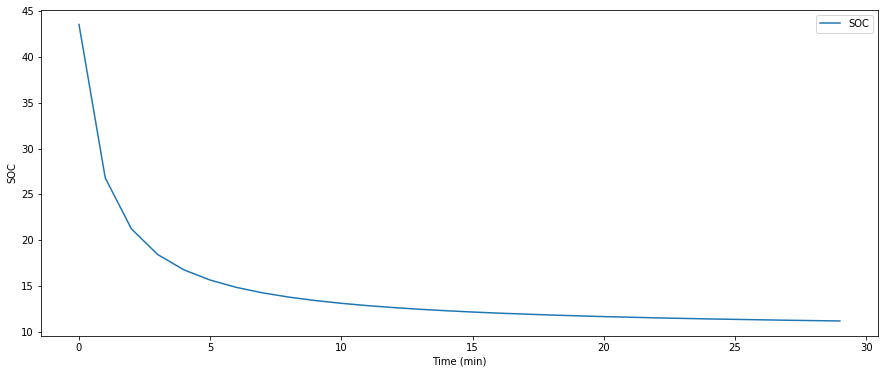

In [18]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['SOC'],label='SOC')
plt.ylabel('SOC')
pyplot.legend()
plt.xlabel('Time (min)')

In [19]:
#Grid supply amount of H1
for i in range(row): 
    df.loc[i,'Grid_supply_H1']= (df.loc[i,'PowerH1']) - df.loc[i,'discharging_amount_H1']
#Grid supply amount of H2
for i in range(row): 
    df.loc[i,'Grid_supply_H2']= (df.loc[i,'PowerH2']) - df.loc[i,'discharging_amount_H2']
#Grid supply amount of H3
for i in range(row): 
    df.loc[i,'Grid_supply_H3']= (df.loc[i,'PowerH3']) - df.loc[i,'discharging_amount_H3']
df

,Time,PowerH1,Forecast_PowerH1,PowerH2,Forecast_PowerH2,PowerH3,Forecast_PowerH3,Power_Gen,Forecast_Gen,Charging_period,...,discharging_period_H1,Charge_amount,discharging_amount_H1,discharging_amount_H2,discharging_amount_H3,Actual_Charge_amount,SOC,Grid_supply_H1,Grid_supply_H2,Grid_supply_H3
0,10/8/2020 0:00,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0,...,0.0,0.0,0.0,0.15552,0.20148,15.000000,43.548567,0.1158,0.00528,0.00552
1,10/8/2020 0:15,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0,...,0.0,0.0,0.0,0.15552,0.20148,14.643000,26.796867,0.1158,0.00528,0.00552
2,10/8/2020 0:30,0.1158,0.130814,0.1608,0.158681,0.2070,0.210175,0.0,0.0,0.0,...,0.0,0.0,0.0,0.15552,0.20148,14.286000,21.212967,0.1158,0.00528,0.00552
3,10/8/2020 0:45,0.1176,0.122472,0.1674,0.161601,0.1908,0.196824,0.0,0.0,0.0,...,0.0,0.0,0.0,0.16212,0.18528,13.929000,18.421017,0.1176,0.00528,0.00552
4,10/8/2020 1:00,0.1164,0.134856,0.1668,0.147155,0.2184,0.193326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.16152,0.21288,13.581600,16.745847,0.1164,0.00528,0.00552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.1878,0.205390,0.2406,0.261118,0.2718,0.237971,0.0,0.0,0.0,...,0.0,0.0,0.0,0.23532,0.26628,12.922347,NaN,0.1878,0.00528,0.00552
188,10/9/2020 23:00,0.1770,0.166415,0.2070,0.239147,0.2442,0.216654,0.0,0.0,0.0,...,0.0,0.0,0.0,0.20172,0.23868,12.420747,NaN,0.1770,0.00528,0.00552
189,10/9/2020 23:15,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0,0.0,...,0.0,0.0,0.0,0.17292,0.23628,11.980347,NaN,0.1722,0.00528,0.00552
190,10/9/2020 23:30,0.1722,0.154863,0.1782,0.218232,0.2418,0.198393,0.0,0.0,0.0,...,0.0,0.0,0.0,0.17292,0.23628,11.571147,NaN,0.1722,0.00528,0.00552


In [20]:
# df.to_csv('output of optimization algorithm for 1th iteration.csv')

In [21]:
df['Charge_amount'].sum()
# df['Power_Gen'].sum()

58.482567

Text(0.5, 0, 'Time (min)')

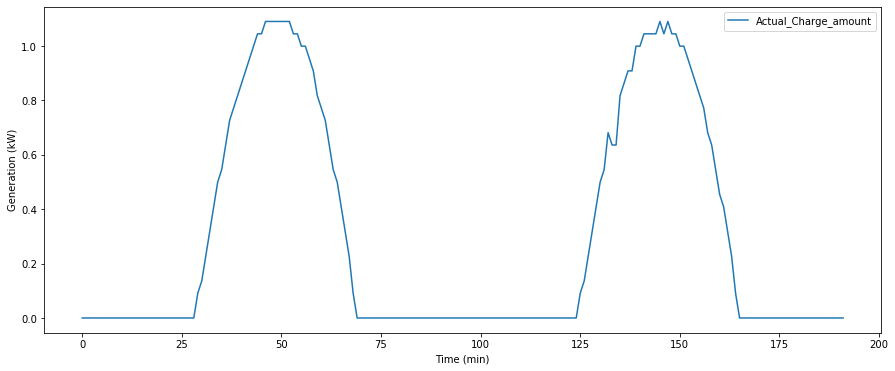

In [22]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['Charge_amount'],label='Actual_Charge_amount')
# # plt.plot(df['discharging_period_H1'],label='discharging_period_H1')
# plt.plot(df['PowerH2'],label='PowerH2')
# # plt.plot(df['discharging_period_H2'],label='discharging_period_H2')
# plt.plot(df['PowerH3'],label='PowerH3')
# # plt.plot(df['discharging_period_H3'],label='discharging_period_H3')
# plt.plot(df['Power_Gen'],label='Power_Gen')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

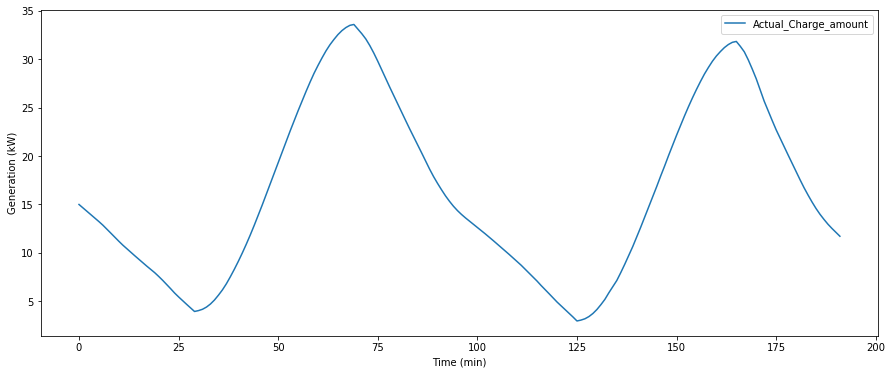

In [655]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['Actual_Charge_amount'],label='Actual_Charge_amount')
# # plt.plot(df['discharging_period_H1'],label='discharging_period_H1')
# plt.plot(df['PowerH2'],label='PowerH2')
# # plt.plot(df['discharging_period_H2'],label='discharging_period_H2')
# plt.plot(df['PowerH3'],label='PowerH3')
# # plt.plot(df['discharging_period_H3'],label='discharging_period_H3')
# plt.plot(df['Power_Gen'],label='Power_Gen')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

In [574]:
# empDfObj = df.dtypes['Actual_Charge_amount']
# print(empDfObj)

In [575]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# ax1.plot(df['Time'], df['discharging_period_H2'])
# ax2.plot(df['Time'], df['discharging_period_H3'])
# ax3.plot(df['Time'], df['discharging_period_H1'])
# # ax4.plot(df['Time'], df['Pri_discharge_amount'])

Text(0.5, 0, 'Time (min)')

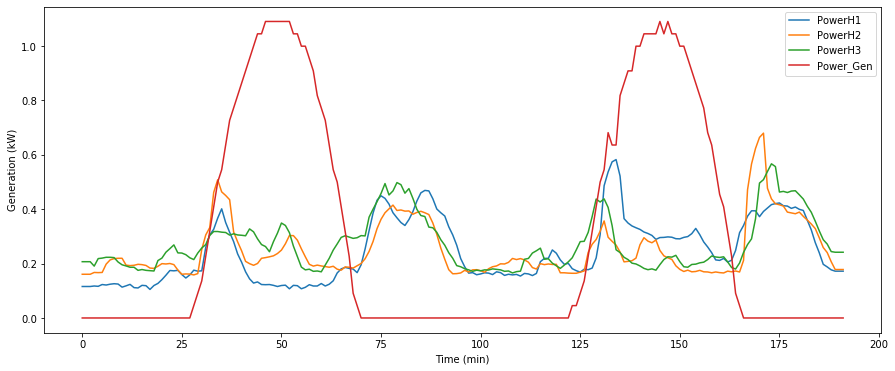

In [576]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['PowerH1'],label='PowerH1')
# plt.plot(df['discharging_period_H1'],label='discharging_period_H1')
plt.plot(df['PowerH2'],label='PowerH2')
# plt.plot(df['discharging_period_H2'],label='discharging_period_H2')
plt.plot(df['PowerH3'],label='PowerH3')
# plt.plot(df['discharging_period_H3'],label='discharging_period_H3')
plt.plot(df['Power_Gen'],label='Power_Gen')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

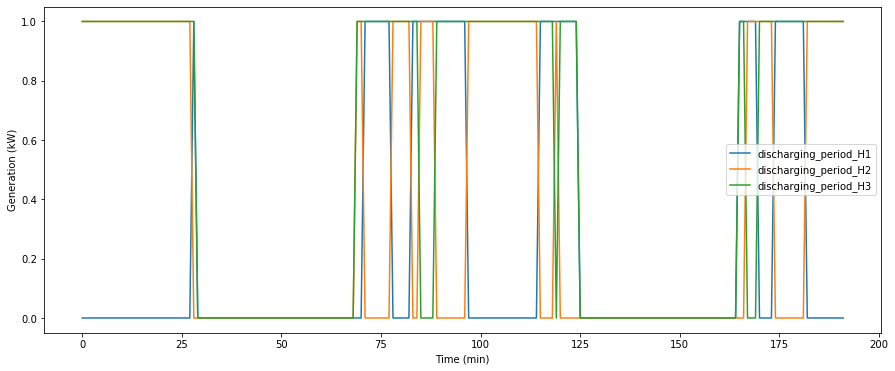

In [528]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
# plt.plot(df['PowerH1'],label='PowerH1')
plt.plot(df['discharging_period_H1'],label='discharging_period_H1')
# plt.plot(df['PowerH2'],label='PowerH2')
plt.plot(df['discharging_period_H2'],label='discharging_period_H2')
# # plt.plot(df['PowerH3'],label='PowerH3')
plt.plot(df['discharging_period_H3'],label='discharging_period_H3')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

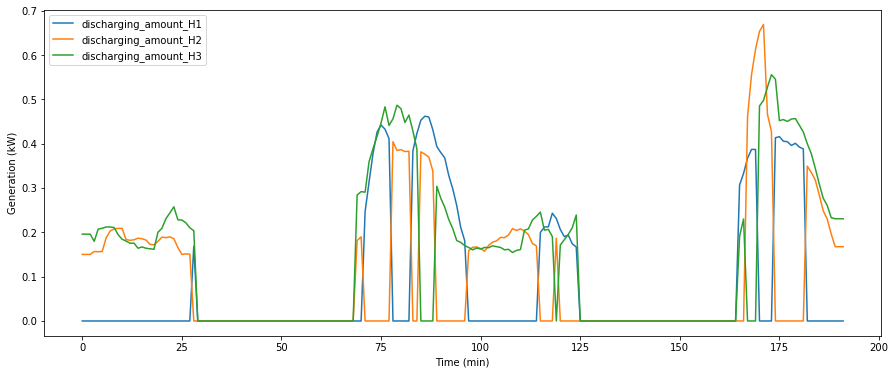

In [529]:
plt.figure(figsize=(15,6))
plt.plot(df['discharging_amount_H1'],label='discharging_amount_H1')
plt.plot(df['discharging_amount_H2'],label='discharging_amount_H2')
plt.plot(df['discharging_amount_H3'],label='discharging_amount_H3')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

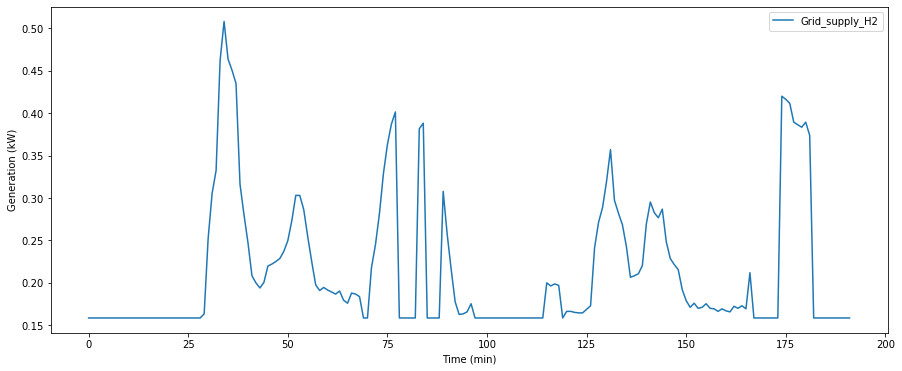

In [226]:
plt.figure(figsize=(15,6))
# plt.plot(df['Grid_supply_H1'],label='Grid_supply_H1')
plt.plot(df['Grid_supply_H2'],label='Grid_supply_H2')
# plt.plot(df['Grid_supply_H3'],label='Grid_supply_H3')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

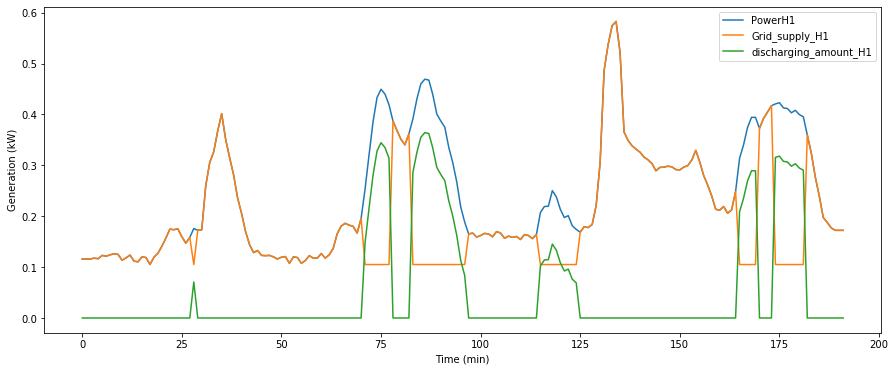

In [227]:
plt.figure(figsize=(15,6))
plt.plot(df['PowerH1'],label='PowerH1')
plt.plot(df['Grid_supply_H1'],label='Grid_supply_H1')
plt.plot(df['discharging_amount_H1'],label='discharging_amount_H1')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

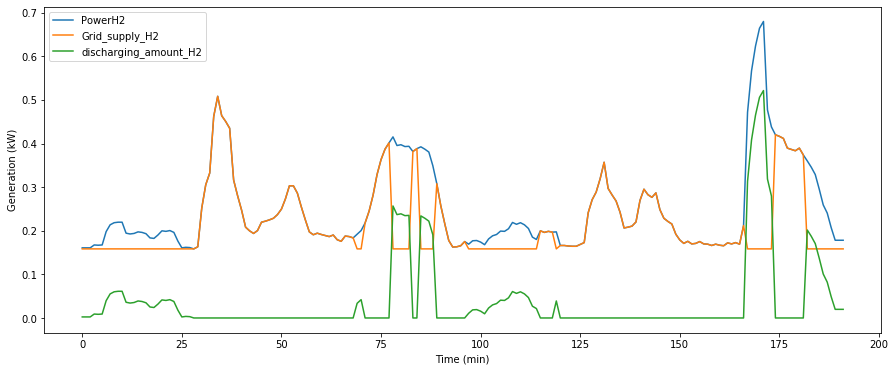

In [228]:
plt.figure(figsize=(15,6))
plt.plot(df['PowerH2'],label='PowerH2')
plt.plot(df['Grid_supply_H2'],label='Grid_supply_H2')
plt.plot(df['discharging_amount_H2'],label='discharging_amount_H2')
plt.ylabel('Generation (kW)') 
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

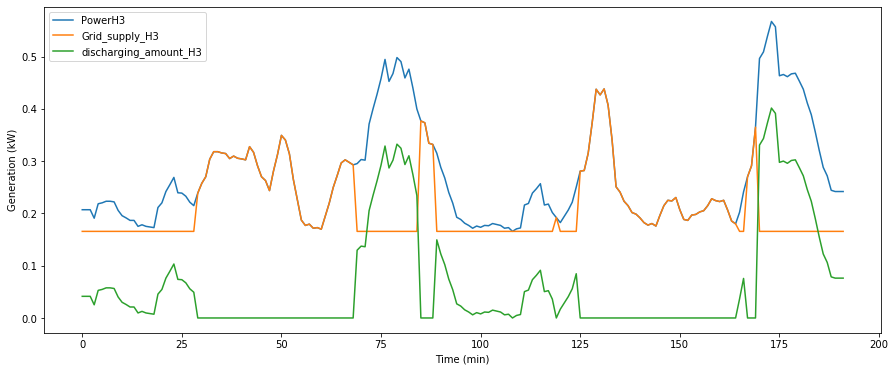

In [229]:
plt.figure(figsize=(15,6))
plt.plot(df['PowerH3'],label='PowerH3')
plt.plot(df['Grid_supply_H3'],label='Grid_supply_H3')
plt.plot(df['discharging_amount_H3'],label='discharging_amount_H3')
plt.ylabel('Generation (kW)') 
pyplot.legend()
plt.xlabel('Time (min)')

In [194]:
# df.to_csv('File Name.csv')

In [195]:
df["Powertotal"] = "" 
df.loc[0,'Powertotal'] = 0.079247
df["Powertotalgen"] = "" 
df.loc[0,'Powertotalgen'] = 0.0000
for i in range(row-1):
            df.loc[i+1,'Powertotal']= (df.loc[i+1,'Forecast_Power'])+(df.loc[i,'Powertotal']);
            df.loc[i+1,'Powertotalgen'] = (df.loc[i+1,'Forecast_Gen'])+(df.loc[i,'Powertotalgen']);
        
df["dayaheadPowerAvg"] = "" 
df["dayPowerAvg"] = "" 
df.loc[0,'dayaheadPowerAvg'] = 0.079247
df.loc[0,'dayPowerAvg'] = 0.079247
onday=96
for i in range(row):
         df.loc[i,'dayaheadPowerAvg'] = (df.loc[i:row, 'Forecast_Power'].sum())/(row-i);
         df.loc[i,'totalpower'] = (df.loc[i:row, 'Forecast_Power'].sum());
for i in range(onday):
         df.loc[i,'dayPowerAvg'] = (df.loc[i:(onday), 'Forecast_Power'].sum())/((onday)-i);
         df.loc[i,'dayPowerAvg'] = (df.loc[i:(onday), 'Forecast_Power'].sum())/((onday)-i);
df['dayPowerAvg'] = pd.to_numeric(df['dayPowerAvg'],errors='coerce')

df["dayaheadGenAvg"] = "" 
df["dayGenAvg"] = "" 
df.loc[0,'dayaheadGenAvg'] = 0.0
df.loc[0,'dayGenAvg'] = 0.0
for i in range(row):
         df.loc[i,'dayaheadGenAvg'] = (df.loc[i:row, 'Forecast_Gen'].sum())/(row-i);
         df.loc[i,'totalpowerge'] = (df.loc[i:row, 'Forecast_Gen'].sum());
for i in range(onday):
         df.loc[i,'dayGenAvg'] = (df.loc[i:(onday), 'Forecast_Gen'].sum())/((onday)-i);
df['dayGenAvg'] = pd.to_numeric(df['dayGenAvg'],errors='coerce')
df

KeyError: 'Forecast_Power'

Text(0.5, 0, 'Time (min)')

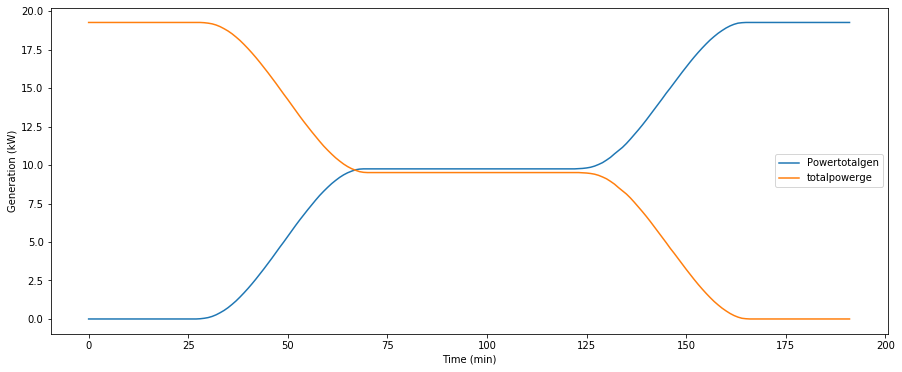

In [111]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['Powertotalgen'],label='Powertotalgen')
plt.plot(df['totalpowerge'],label='totalpowerge')
# plt.plot(df['dayPowerAvg'],label='dayPowerAvg')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

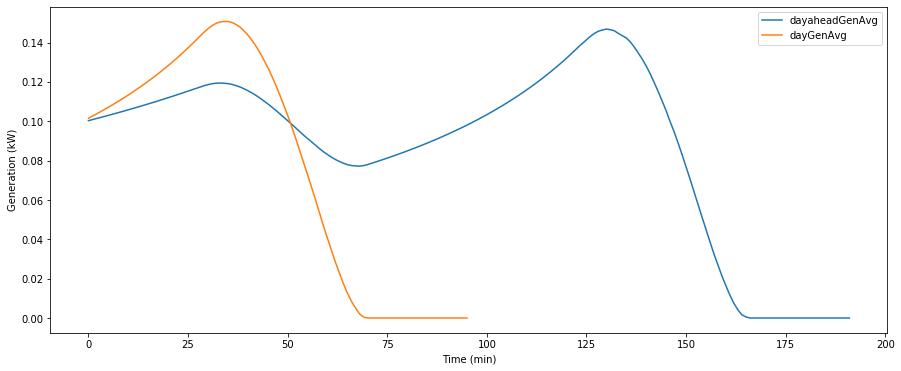

In [112]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['dayaheadGenAvg'],label='dayaheadGenAvg')
plt.plot(df['dayGenAvg'],label='dayGenAvg')
# plt.plot(df['dayPowerAvg'],label='dayPowerAvg')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

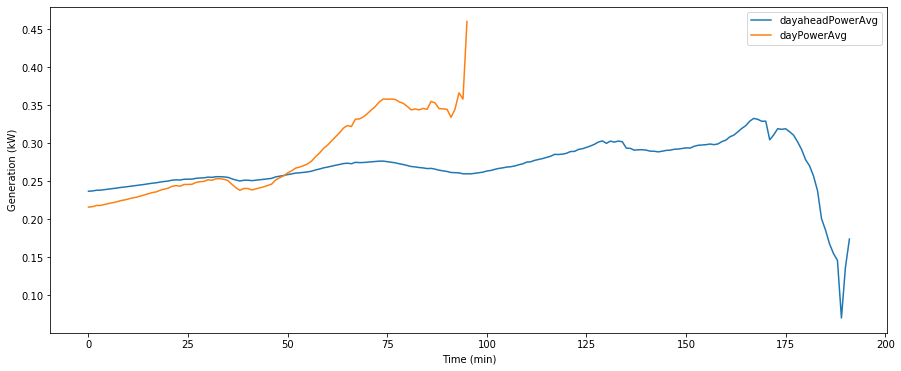

In [113]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
# plt.plot(df['Powertotal'],label='Powertotal')
plt.plot(df['dayaheadPowerAvg'],label='dayaheadPowerAvg')
plt.plot(df['dayPowerAvg'],label='dayPowerAvg')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

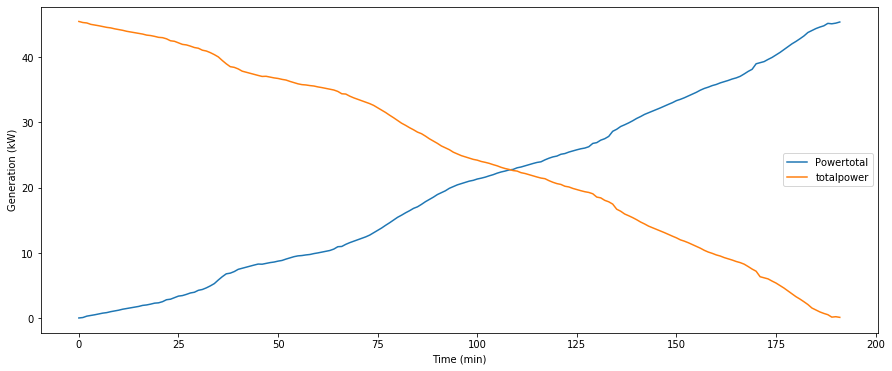

In [114]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['Powertotal'],label='Powertotal')
plt.plot(df['totalpower'],label='totalpower')
# plt.plot(df['dayPowerAvg'],label='dayPowerAvg')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

In [106]:
df['Power'] = pd.to_numeric(df2['Power'],errors='coerce')
df['Forecast_Power'] = pd.to_numeric(df3['Forecast_Power'],errors='coerce')
df

,Time,Power,Forecast_Power,Power_Gen,Forecast_Gen,Powertotal,Powertotalgen,dayaheadPowerAvg,dayPowerAvg,totalpower,dayaheadGenAvg,dayGenAvg,totalpowerge
0,10/8/2020 0:00,0.125,0.147655,0.0,0.0,0.079247,0,0.236711,0.215828,45.448568,0.100312,0.101562,19.26
1,10/8/2020 0:15,0.125,0.147655,0.0,0.0,0.146851,0,0.237103,0.216396,45.286684,0.100838,0.102632,19.26
2,10/8/2020 0:30,0.120,0.127529,0.0,0.0,0.360328,0,0.237995,0.217979,45.219080,0.101368,0.103723,19.26
3,10/8/2020 0:45,0.109,0.141527,0.0,0.0,0.461835,0,0.238125,0.218027,45.005603,0.101905,0.104839,19.26
4,10/8/2020 1:00,0.110,0.110427,0.0,0.0,0.571433,0,0.238852,0.219294,44.904097,0.102447,0.105978,19.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.181,0.265241,0.0,0.0,44.7829,19.26,0.154863,NaN,0.774314,0,NaN,0.00
188,10/9/2020 23:00,0.184,0.167078,0.0,0.0,45.1557,19.26,0.145748,NaN,0.582991,0,NaN,0.00
189,10/9/2020 23:15,0.169,0.136381,0.0,0.0,45.0929,19.26,0.0700661,NaN,0.210198,0,NaN,0.00
190,10/9/2020 23:30,0.163,0.070066,0.0,0.0,45.1921,19.26,0.13654,NaN,0.273079,0,NaN,0.00


In [122]:
df["ESS Charge"] = "" 
df.loc[0,'ESS Charge'] =5;
# df.loc[0,'ESS Charge'] = df['totalpower'].max();
df["discharge"] = "" 
df.loc[0,'discharge'] =0.194119;
for i in range(row-1):
        if df.loc[i,'Power_Gen']<= 0.1:
#         if df.loc[i,'ESS Charge']> 0 and df.loc[i,'Power_Gen']<= 0:
#             for i in range(row-1):
                if df.loc[i, 'Forecast_Power']<=df.loc[i,'dayaheadPowerAvg']:
                    df.loc[i+1,'discharge'] = df.loc[i+1,'Power'];
                    df.loc[i+1,'ESS Charge']=abs(df.loc[i,'ESS Charge'])-df.loc[i+1,'discharge'];
                else:
                    df.loc[i+1,'discharge'] = (df.loc[i,'dayaheadPowerAvg']);
#                     df.loc[i+1,'discharge'] = ((df.loc[i,'totalpower']/df.loc[i,'ESS Charge'])*df.loc[i,'PowerAvg']);
                    df.loc[i+1,'ESS Charge']=(df.loc[i,'ESS Charge'])-df.loc[i+1,'discharge']; 
#         elif df.loc[i,'Power_Gen']> 0:
#                 df.loc[i,'discharge'] = 0;
#                 df.loc[i,'ESS Charge']=(df.loc[i:row, 'Power_Gen'].sum());
            
        else:
            df.loc[i,'discharge'] = 0;
            df.loc[i+1,'ESS Charge']= df.loc[i,'ESS Charge'] + df.loc[i,'Power_Gen']; 
df

,Time,Power,Forecast_Power,Power_Gen,Forecast_Gen,Powertotal,Powertotalgen,dayaheadPowerAvg,dayPowerAvg,totalpower,dayaheadGenAvg,dayGenAvg,totalpowerge,ESS Charge,discharge
0,10/8/2020 0:00,0.117,0.161884,0.0,0.0,0.079247,0,0.236711,0.215828,45.448568,0.100312,0.101562,19.26,5,0.194119
1,10/8/2020 0:15,0.135,0.067604,0.0,0.0,0.146851,0,0.237103,0.216396,45.286684,0.100838,0.102632,19.26,4.865,0.135
2,10/8/2020 0:30,0.123,0.213477,0.0,0.0,0.360328,0,0.237995,0.217979,45.219080,0.101368,0.103723,19.26,4.742,0.123
3,10/8/2020 0:45,0.102,0.101507,0.0,0.0,0.461835,0,0.238125,0.218027,45.005603,0.101905,0.104839,19.26,4.64,0.102
4,10/8/2020 1:00,0.102,0.109599,0.0,0.0,0.571433,0,0.238852,0.219294,44.904097,0.102447,0.105978,19.26,4.538,0.102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.207,0.191324,0.0,0.0,44.7829,19.26,0.154863,NaN,0.774314,0,NaN,0.00,1.663,0.167654
188,10/9/2020 23:00,0.165,0.372792,0.0,0.0,45.1557,19.26,0.145748,NaN,0.582991,0,NaN,0.00,1.50814,0.154863
189,10/9/2020 23:15,0.180,-0.062881,0.0,0.0,45.0929,19.26,0.0700661,NaN,0.210198,0,NaN,0.00,1.36239,0.145748
190,10/9/2020 23:30,0.162,0.099231,0.0,0.0,45.1921,19.26,0.13654,NaN,0.273079,0,NaN,0.00,1.20039,0.162


In [123]:
df['discharge'] = pd.to_numeric(df['discharge'],errors='coerce')

In [124]:
df["Grid supply"] = "" 
for i in range(row-1):
    df.loc[i+1,'Grid supply']=abs((df.loc[i,'Power'])-df.loc[i,'discharge']);
df['Grid supply'] = pd.to_numeric(df['Grid supply'],errors='coerce')
df

,Time,Power,Forecast_Power,Power_Gen,Forecast_Gen,Powertotal,Powertotalgen,dayaheadPowerAvg,dayPowerAvg,totalpower,dayaheadGenAvg,dayGenAvg,totalpowerge,ESS Charge,discharge,Grid supply
0,10/8/2020 0:00,0.117,0.161884,0.0,0.0,0.079247,0,0.236711,0.215828,45.448568,0.100312,0.101562,19.26,5,0.194119,NaN
1,10/8/2020 0:15,0.135,0.067604,0.0,0.0,0.146851,0,0.237103,0.216396,45.286684,0.100838,0.102632,19.26,4.865,0.135000,0.077119
2,10/8/2020 0:30,0.123,0.213477,0.0,0.0,0.360328,0,0.237995,0.217979,45.219080,0.101368,0.103723,19.26,4.742,0.123000,0.000000
3,10/8/2020 0:45,0.102,0.101507,0.0,0.0,0.461835,0,0.238125,0.218027,45.005603,0.101905,0.104839,19.26,4.64,0.102000,0.000000
4,10/8/2020 1:00,0.102,0.109599,0.0,0.0,0.571433,0,0.238852,0.219294,44.904097,0.102447,0.105978,19.26,4.538,0.102000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,10/9/2020 22:45,0.207,0.191324,0.0,0.0,44.7829,19.26,0.154863,NaN,0.774314,0,NaN,0.00,1.663,0.167654,0.014718
188,10/9/2020 23:00,0.165,0.372792,0.0,0.0,45.1557,19.26,0.145748,NaN,0.582991,0,NaN,0.00,1.50814,0.154863,0.039346
189,10/9/2020 23:15,0.180,-0.062881,0.0,0.0,45.0929,19.26,0.0700661,NaN,0.210198,0,NaN,0.00,1.36239,0.145748,0.010137
190,10/9/2020 23:30,0.162,0.099231,0.0,0.0,45.1921,19.26,0.13654,NaN,0.273079,0,NaN,0.00,1.20039,0.162000,0.034252


Text(0.5, 0, 'Time (min)')

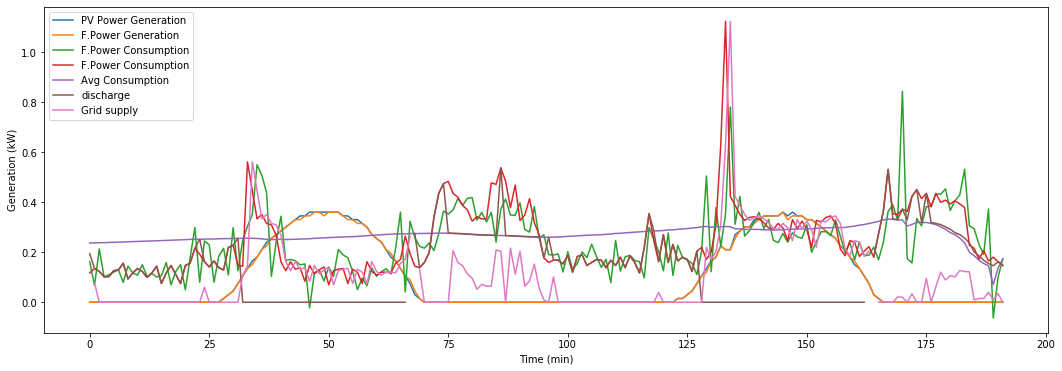

In [125]:
plt.figure(figsize=(18,6))
plt.plot(df['Power_Gen'],label='PV Power Generation') 
plt.plot(df['Forecast_Gen'],label='F.Power Generation')
plt.plot(df['Forecast_Power'],label='F.Power Consumption')
plt.plot(df['Power'],label='F.Power Consumption')
plt.plot(df['dayaheadPowerAvg'],label='Avg Consumption')
plt.plot(df['discharge'],label='discharge')
plt.plot(df['Grid supply'],label='Grid supply')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

In [126]:
# df1 = df.loc[:,['discharge']]
# print (df1.dtypes)

In [15]:
# # df2['discharge'] = df1['discharge'].astype(float)
# df['discharge'] = pd.to_numeric(df1['discharge'],errors='coerce')


Text(0.5, 0, 'Time (min)')

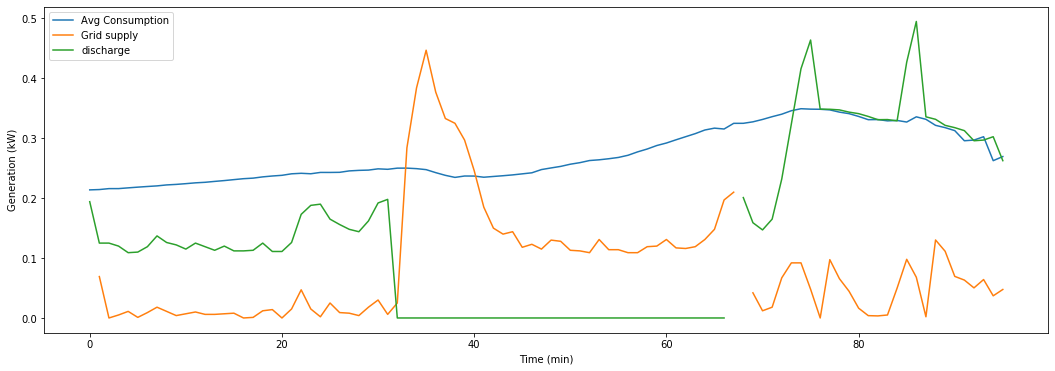

In [239]:
plt.figure(figsize=(18,6))
# plt.plot(df['Power_Gen'],label='PV Power Generation') 
# plt.plot(df['Forecast_Gen'],label='F.Power Generation')
# plt.plot(df['Forecast_Power'],label='F.Power Consumption')
plt.plot(df['PowerAvg'],label='Avg Consumption')
plt.plot(df['Grid supply'],label='Grid supply')
plt.plot(df['discharge'],label='discharge')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

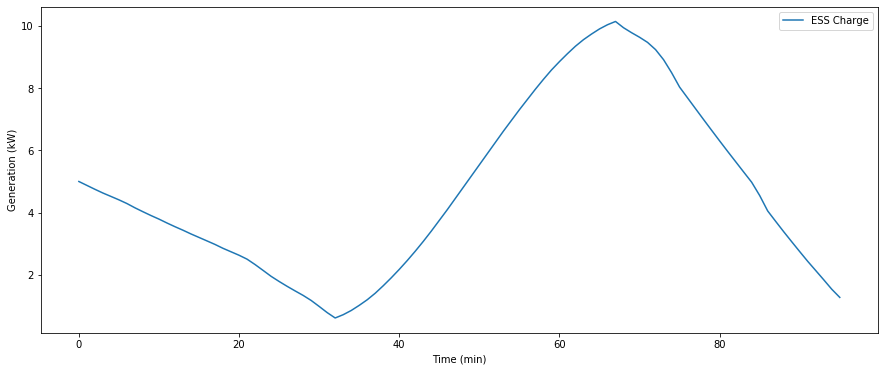

In [240]:
# df=df[0:192]
plt.figure(figsize=(15,6))
# plt.plot(df['Power_Gen']/1000,label='PV Power Generation') 
# plt.plot(df['Forecast_Gen'],label='F.Power Generation')
plt.plot(df['ESS Charge'],label='ESS Charge')
# plt.plot(df['Powertotal'],label='Powertotal')
# plt.plot(df['totalpower'],label='totalpower')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

Text(0.5, 0, 'Time (min)')

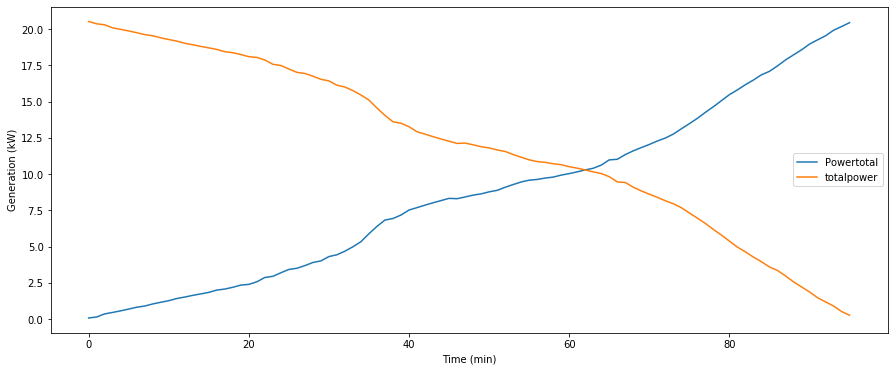

In [241]:
plt.figure(figsize=(15,6))
# plt.plot(df['ESS Charge'],label='ESS Charge')
plt.plot(df['Powertotal'],label='Powertotal')
plt.plot(df['totalpower'],label='totalpower')
plt.ylabel('Generation (kW)')
pyplot.legend()
plt.xlabel('Time (min)')

In [242]:
df.to_csv(r'C:\Users\Md. Morshed Alam\Desktop\Project\ENS\Python_code\AfterJejuCon2021v2.csv')
df

,Time,Power,Forecast_Power,Power_Gen,Forecast_Gen,Powertotal,PowerAvg,totalpower,ESS Charge,discharge,Grid supply
0,10/8/2020 0:00,0.125,0.147655,0.0,0.0,0.079247,0.213844,20.529011,5,0.194119,NaN
1,10/8/2020 0:15,0.125,0.147655,0.0,0.0,0.146851,0.214391,20.367128,4.875,0.125000,6.911900e-02
2,10/8/2020 0:30,0.120,0.127529,0.0,0.0,0.360328,0.215952,20.299523,4.75,0.125000,2.775558e-17
3,10/8/2020 0:45,0.109,0.141527,0.0,0.0,0.461835,0.215979,20.086047,4.63,0.120000,5.000000e-03
4,10/8/2020 1:00,0.110,0.110427,0.0,0.0,0.571433,0.217223,19.984540,4.521,0.109000,1.100000e-02
...,...,...,...,...,...,...,...,...,...,...,...
91,10/8/2020 22:45,0.363,0.322924,0.0,0.0,19.2584,0.295851,1.479253,2.43454,0.312757,6.326602e-02
92,10/8/2020 23:00,0.360,0.318010,0.0,0.0,19.5386,0.297001,1.188004,2.13869,0.295851,5.024333e-02
93,10/8/2020 23:15,0.334,0.306178,0.0,0.0,19.9212,0.30259,0.907769,1.84169,0.297001,6.414937e-02
94,10/8/2020 23:30,0.255,0.302590,0.0,0.0,20.1769,0.262611,0.525222,1.5391,0.302590,3.699891e-02


In [16]:
Max_Capacity=df['Power_Gen'].max()
Max_Capacity
# per=percentage
#calculate day load from t
#let t=00:00
df["Powertotal"] = "" 
df.loc[0,'Powertotal'] = 0.079247
for i in range(row-1):
            df.loc[i+1,'Powertotal']= (df.loc[i,'Forecast_Power'])+(df.loc[i,'Powertotal']);
                                       
#print("Mean is :", Power)
# for i in range(row-1):
#          df.loc[i+1,'Power(d)']= ((df.loc[i+1,'Forecast_Power'])+(df.loc[i,'Power(d)']));
#          df.loc[i+1,'Power(d)']= ((df.loc[i+1,'Forecast_Power'])+(df.loc[i,'Power(d)']))/int (i+1);
#print("Mean is :", Power)

df["PowerAvg"] = "" 
df.loc[0,'PowerAvg'] = 0.079247
df["PowerAvg"] = "" 
df.loc[0,'PowerAvg'] = 0.079247
for i in range(row):
         df.loc[i,10:11] = (df.loc[i+1:row, 'Forecast_Power'].sum())/(row-i);
         df.loc[i,'totalpower'] = (df.loc[i:row, 'Forecast_Power'].sum());
        

df["ESS Charge"] = "" 
df.loc[0,'ESS Charge'] =3;
# df.loc[0,'ESS Charge'] = df['totalpower'].max();
df["discharge"] = "" 
df.loc[0,'discharge'] =0.194119;
for i in range(row-1):
        if df.loc[i,'Power_Gen']<= 0:
#         if df.loc[i,'ESS Charge']> 0 and df.loc[i,'Power_Gen']<= 0:
            for i in range(row-1):
                if df.loc[i+1, 'Forecast_Power']<=df.loc[i,'PowerAvg']:
                    df.loc[i+1,'discharge'] = df.loc[i,'Forecast_Power'];
                    df.loc[i+1,'ESS Charge']=(df.loc[i,'ESS Charge'])-df.loc[i+1,'discharge'];
                else:
                    df.loc[i+1,'discharge'] = ((df.loc[i,'ESS Charge']/df.loc[i,'totalpower'])*df.loc[i,'PowerAvg']);
                    df.loc[i+1,'ESS Charge']=(df.loc[i,'ESS Charge'])-df.loc[i+1,'discharge']; 
#         elif df.loc[i,'Power_Gen']> 0:
#                 df.loc[i,'discharge'] = 0;
#                 df.loc[i,'ESS Charge']=(df.loc[i:row, 'Power_Gen'].sum());
            
        else:
            df.loc[i,'discharge'] = 0;
            df.loc[i+1,'ESS Charge']= df.loc[i,'ESS Charge'] + df.loc[i,'Power_Gen']; 
            

# for i in range(row):
#          df.loc[i+1,'discharge'] = ((df.loc[i,'ESS Charge']/df.loc[i,'totalpower'])*df.loc[i,'PowerAvg']);
#          df.loc[i+1,'ESS Charge']=(df.loc[i,'ESS Charge'])-df.loc[i+1,'discharge'];
# df.loc[0,'ESS Charge'] = 5
# df["ratio"] = ""
# for i in range(row)
#       ratio= df.loc[i+1,'Forecast_Power'])/
# print(total)
# for i in range(row-1):
#          Power= ((df.loc[i+1,'Forecast_Power'])+(df.loc[i,'Power(d)']));

# print("Mean is :", 'Power(d)')
# for i in range(row):
#         df.loc[i,'Per_Gen'] = (df.loc[i,'Power_Gen'])/(Max_Capacity*.3)
# for i in range(row):
#         df.loc[i,'Charge_Grid'] = (np.exp((df.loc[i,'Per_Gen'])))
# for i in range(row):
#         df.loc[i,'Charge_Grid_actual'] = (df.loc[i,'Charge_Grid']-1)
# Max_Charge=df['Charge_Grid_actual'].max()
# Max_Charge       
# for i in range(row):
#         df.loc[i,'Charge_Grid_Percentage'] = (df.loc[i,'Charge_Grid_actual']*1/(Max_Charge*2))
# Max_Per_Gen=df['Per_Gen'].max()
# Max_Per_Gen
# for i in range(row):
#         df.loc[i,'New_Gen_Percentage'] = (df.loc[i,'Per_Gen']*1/Max_Per_Gen)
# for i in range(row):
#         df.loc[i,'Grid_amount'] = (df.loc[i,'Charge_Grid_Percentage']*df.loc[i,'Power_Gen'])
# for i in range(row):
#         df.loc[i,'ESS_amount'] = (df.loc[i,'Power_Gen']-df.loc[i,'Grid_amount'])
df.head(100)
# df.to_csv(r'C:\Users\Md. Morshed Alam\Desktop\Project\ENS\Python_code\AfterJejuCon2021.csv')

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'str'

In [21]:
df["PV charge"] = "" 
df.loc[0,'PV charge'] =0.194119;
for i in range(row-1):
    if df.loc[i,'Power_Gen']>.01:
        df.loc[i+1,'PV charge']=(df.loc[i,'ESS Charge']) + df.loc[i+1,'Power_Gen'];
    else:
        df.loc[i+1,'PV charge']=(df.loc[i,'ESS Charge']);
df.head(50)

TypeError: can only concatenate str (not "numpy.float64") to str